
$\qquad$ $\qquad$$\qquad$  **TDA206/DIT206 Discrete Optimization: Assignment 1 -- Modelling and Solving LPs** <br />
$\qquad$ $\qquad$$\qquad$                   **Grader: N/A** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 27th January** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Josef Jakobson, 0208282079, josefjak@chalmers.se <br />
$\qquad$ $\qquad$$\qquad$                                   Zoe Opdendries, 0208100065, zoe@zaloz.se <br />


---


General guidelines:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   Before submitting, make sure that your Jupyter notebook run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.


# Problem 1.

Consider the following LP problem:


\begin{array}
\mathcal{max}\quad 4x_1-2x_2+5x_3+6x_4+7x_5\\
\textrm{s.t} \\
2x_1 + 2x_2 - 4x_3 + 4x_4 + 8x_5 \leq 6\\
2x_1 + x_2 - 2x_3 - x_4 - 3x_5 \geq -1\\
5x_1 - 2x_2 + 4x_3 + 4x_4 + 2x_5 = 5\\
2x_1 - 2x_2 + 5x_3 + 3x_4 + x_5 \leq 4\\
\vec x \geq \vec 0
\end{array}

* Use CVXPY to solve the LP above. Submit your code, and print the solution vector and objective value.

In [76]:
import cvxpy as cp

x1 = cp.Variable()
x2 = cp.Variable()
x3 = cp.Variable()
x4 = cp.Variable()
x5 = cp.Variable()

obj = cp.Maximize(4*x1 - 2*x2 + 5*x3 + 6*x4 + 7*x5)

constraints = [2*x1+2*x2-4*x3+4*x4+8*x5 <= 6, 
               2*x1 + x2 - 2*x3 - x4 - 3*x5 >= -1,
               5*x1 - 2*x2 + 4*x3 + 4*x4 + 2*x5 == 5,
               2*x1 - 2*x2 + 5*x3 + 3*x4 + x5 <= 4,
               x1 >= 0, x2 >= 0, x3 >= 0, x4 >= 0, x5 >= 0]
               
            

prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x1.value, x2.value, x3.value, x4.value, x5.value)

# Optimal solution found
# Optimal value = 9.22
# Optimal variables: x1 = 0.627, x2 = 2.81, x3 = 1.54, x4 = 1.17, x5 = 0.661

status: optimal
optimal value 9.220338951278354
optimal var 0.6271186572420944 2.8135594025836776 1.5423729088307199 1.1743968986062282e-09 0.6610169394681931


# Problem 2.

There are 3 people who all start at the same location, and want to get to same end destination a total of $d=100$ units away. They have 1 bicycle, which they have to share. The amount of distance per unit time that the three people can cover walking and cycling is given below:

\begin{array}{l|c|c|} 
      & Walking Speed & Cycling Speed\\ \hline
 Person\ 1 &  1 & 6 \\
 Person\ 2 &  2 & 8 \\
 Person\ 3 &  1 & 6\\ \hline
\end{array}

Our goal is to minimize the time $t$ required for all people to reach the end destination. For each person consider 4 variables $x_i$, $u_i$, $y_i$, $z_i$, which respectively are the amount of time walking forwards, the amount of time walking backwards, the amount of time cycling forwards, and the amount of time cycling backwards. 

1. Formulate an LP to solve this problem for the generic where there are $n$ people trying to move a distance $d$, each with walking rate $w_i$ and biking rate $b_i$ for $i = 1\ldots n$.

    You should consider the following constraints
    - each person's total time for moving (forwards, backwards, walking, bike) not exceed the total time $t$
    - each person must make it all the way to $d$, recall that distance = velocity * time
    - the bike, riding forwards or backwards, can only be used for at most $t$ units of time.
    - the bike's distance to the start is at most $d$, remember that it can move both forwards and backwards.
    - time cannot be negative
   
2. Implement the generic LP in CVXPY and solve for the specific case of 3 people given above. Submit your code and write down objective and solution. Also confirm that the optimal solution satisfies $u_i = 0$ (i.e. no one ever walks backwards) and $y_iz_i = 0$ for all persons (i.e. no person ever cycles both forwards and backwards).

3. Use CVXPY to show what would happen if there was a 4th person who could walk at rate $3$ and cycle at rate $9$.



\begin{array}
\mathcal{min} \quad t\\
\textrm{s.t} \\
t \geq x_1 + u_1 + y_1 + z_1\\
... \\
t \geq x_n + u_n + y_n + z_n\\
w_1(x_1 - u_1) + b_1(y_1 + z_1) = d\\
...\\
w_n(x_n - u_n) + b_n(y_n + z_n) = d\\
\sum^n_{i = 1} (y_i + z_i) \leq t\\
b_1 (y_1 - z_1) \leq d\\
...\\
b_n (y_n - z_n) \leq d\\
\vec {(x_i, u_i, y_i, z_i)^n_{i=1}} \geq \vec 0
\end{array} 

In [9]:
import cvxpy as cp

x1 = cp.Variable(nonneg=True)
u1 = cp.Variable(nonneg=True)
y1 = cp.Variable(nonneg=True)
z1 = cp.Variable(nonneg=True)

x2 = cp.Variable(nonneg=True)
u2 = cp.Variable(nonneg=True)
y2 = cp.Variable(nonneg=True)
z2 = cp.Variable(nonneg=True)

x3 = cp.Variable(nonneg=True)
u3 = cp.Variable(nonneg=True)
y3 = cp.Variable(nonneg=True)
z3 = cp.Variable(nonneg=True)

t = cp.Variable()

obj = cp.Minimize(t)

constraints = [
                t >= x1 + u1 + y1 + z1,
                t >= x2 + u2 + y2 + z2,
                t >= x3 + u3 + y3 + z3,
                100 == 1*(x1-u1) + 6*(y1-z1), 
                100 == 2*(x2-u2) + 8*(y2-z2), 
                100 == 1*(x3-u3) + 6*(y3-z3), 
                t >= (y1 + z1) + (y2 + z2) + (y3 + z3),
                t >= 0,
                x1 >= 0, u1 >= 0, y1 >= 0, z1 >= 0, 
                 x2 >= 0, u2 >= 0, y2 >= 0, z2 >= 0,
                 x3 >= 0, u3 >= 0, y3 >= 0, z3 >= 0
               ]

prob = cp.Problem(obj, constraints)
result = prob.solve()
print("person1: ", x1.value, u1.value, y1.value, z1.value) 
print("person2: ", x2.value, u2.value, y2.value, z2.value) 
print("person3: ", x3.value, u3.value, y3.value, z3.value) 
print("time =", t.value)


person1:  19.23076920689141 1.8191215148992635e-08 13.461538469340011 7.900410014266375e-10
person2:  26.923076933357205 5.6229194634082215e-09 5.7692307691329345 1.0665044885327422e-09
person3:  19.23076920689141 1.8191215148991173e-08 13.461538469340011 7.900410014266076e-10
time = 32.69230770786605


In [10]:
import cvxpy as cp

x1 = cp.Variable(nonneg=True)
u1 = cp.Variable(nonneg=True)
y1 = cp.Variable(nonneg=True)
z1 = cp.Variable(nonneg=True)

x2 = cp.Variable(nonneg=True)
u2 = cp.Variable(nonneg=True)
y2 = cp.Variable(nonneg=True)
z2 = cp.Variable(nonneg=True)

x3 = cp.Variable(nonneg=True)
u3 = cp.Variable(nonneg=True)
y3 = cp.Variable(nonneg=True)
z3 = cp.Variable(nonneg=True)


x4 = cp.Variable(nonneg=True)
u4 = cp.Variable(nonneg=True)
y4 = cp.Variable(nonneg=True)
z4 = cp.Variable(nonneg=True)

t = cp.Variable()

obj = cp.Minimize(t)

constraints = [ 
                t >= x1 + u1 + y1 + z1,
                t >= x2 + u2 + y2 + z2,
                t >= x3 + u3 + y3 + z3,
                t >= x4 + u4 + y4 + z4,
                100 == 3*(x4 - u4) + 9*(y4 - z4),
                100 == 1*(x1-u1) + 6*(y1-z1), 
                100 == 2*(x2-u2) + 8*(y2-z2), 
                100 == 1*(x3-u3) + 6*(y3-z3),
                t >= (y1 + z1 + y1 + u1) + (y2 + z2 + y2 + u2) + (y3 + z3 + y3 + u3) + (y4+z4 + y4 + u4),
                t >= 0,
                x1 >= 0, u1 >= 0, y1 >= 0, z1 >= 0, 
                x2 >= 0, u2 >= 0, y2 >= 0, z2 >= 0,
                x3 >= 0, u3 >= 0, y3 >= 0, z3 >= 0,
                x4 >= 0, u4 >= 0, y4 >= 0, z4 >= 0
               ]

prob = cp.Problem(obj, constraints)
result = prob.solve()
print("person1: ", x1.value, u1.value, y1.value, z1.value) 
print("person2: ", x2.value, u2.value, y2.value, z2.value) 
print("person3: ", x3.value, u3.value, y3.value, z3.value) 
print("person4: ", x4.value, u4.value, y4.value, z4.value) 
print("time =", t.value)


person1:  35.135137550785544 3.6259294928695663e-07 10.81081058230922 1.1367464168701876e-07
person2:  44.594596493976546 2.770655470578314e-07 1.351351172109246 2.2633697473929394e-07
person3:  35.13513755078555 3.6259294928695663e-07 10.81081058230922 1.1367464168702104e-07
person4:  33.3333362989509 8.623511784045089e-07 5.592092082558389e-07 1.2602979908258107e-06
time = 45.94594956539879


# Question 3.
Use CVXPY to model and solve the other examples in the textbook (sections 2.1 -- 2.6).

### 2.1

In [11]:
import cvxpy as cp

# Optimized Diet Problem 

carrot = cp.Variable()
cabbage = cp.Variable()
pickle = cp.Variable()

 
# Objective function
objective = cp.Minimize(0.75*carrot + 0.5*cabbage + 0.15*pickle)
constraints = [carrot >= 0, cabbage >= 0, pickle >= 0, 
            35*carrot +0.5*cabbage +0.5*pickle >= 0.5, 
            60*carrot+ 300*cabbage + 10*pickle >= 15, 
            30*carrot+ 20*cabbage + 10*pickle >= 4]

# Form and solve problem.
prob = cp.Problem(objective, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", carrot.value, cabbage.value, pickle.value)


status: optimal
optimal value 0.07051091020189401
optimal var 0.00952634388479011 0.038265035118985914 0.29489089819205655


### 2.2

In [12]:
import cvxpy as cp

X = cp.Variable(10)
xoa, xob, xoc, xab, xad, xbe, xcd, xce, xdn, xen = X

obj = cp.Maximize(xoa + xob + xoc)

cons = [-3 <= xoa, xoa <= 3, 
        -1 <= xob, xob <= 1, 
        -1 <= xoc, xoc <= 1,
        -1 <= xab, xab <= 1, 
        -1 <= xad, xad <= 1, 
        -3 <= xbe, xbe <= 3,
        -4 <= xcd, xcd <= 4, 
        -4 <= xce, xce <= 4, 
        -4 <= xdn, xdn <= 4,
        -1 <= xen, xen <= 1,
        
        xoa == xab + xad,
        xob + xab == xbe,
        xoc == xcd + xce,
        xad + xcd == xdn,
        xbe + xce == xen]

problem = cp.Problem(obj, cons)
result = problem.solve()

print(result)
print(X.value)

3.9999999961661765
[ 2.          1.          1.          1.          1.          2.
  2.19322917 -1.19322917  3.19322917  0.80677083]


### 2.3

In [13]:
import cvxpy as cp

# dont need to add >= 0 since we put it in the decleration
#oklart om demand är rätt hitta inte vart det stos så la in det genom grafen
x = cp.Variable(12, nonneg=True) # Production
y = cp.Variable(12, nonneg=True) # increase in production
z = cp.Variable(12, nonneg=True) # decrease in production
s = cp.Variable(12, nonneg=True) # total surplus

d = [350,340,450,650,650,550,700,680,340,450,400,650] # Demand

obj = cp.Minimize(50 * cp.sum(y) + 50 * cp.sum(z) + 20 * cp.sum(s))

cons = []

cons += [x[i] + s[i-1] - s[i] == d[i] for i in range(1,12)]
cons += [x[i] - x[i-1] == y[i] - z[i] for i in range(1,12)]
cons += [x[0] == 0, s[0] == 0, s[11] == 0]

problem = cp.Problem(obj, cons)
result = problem.solve()

print(result)
print(x.value)
print(y.value)
print(z.value)
print(s.value)



53133.333328871944
[1.47766464e-14 3.40000000e+02 4.63333332e+02 6.43333334e+02
 6.43333334e+02 6.43333334e+02 6.43333333e+02 6.43333333e+02
 4.60000000e+02 4.60000000e+02 4.60000000e+02 4.60000000e+02]
[0.00000000e+00 3.40000000e+02 1.23333332e+02 1.80000001e+02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.87330299e-08 6.71740469e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.62569759e-07 3.95030642e-08 1.62095968e-07
 1.83333333e+02 1.38120638e-08 0.00000000e+00 0.00000000e+00]
[0.00000000e+00 1.36311022e-07 1.33333324e+01 6.66666617e+00
 0.00000000e+00 9.33333335e+01 3.66666668e+01 0.00000000e+00
 1.20000000e+02 1.30000000e+02 1.90000000e+02 0.00000000e+00]


### 2.4

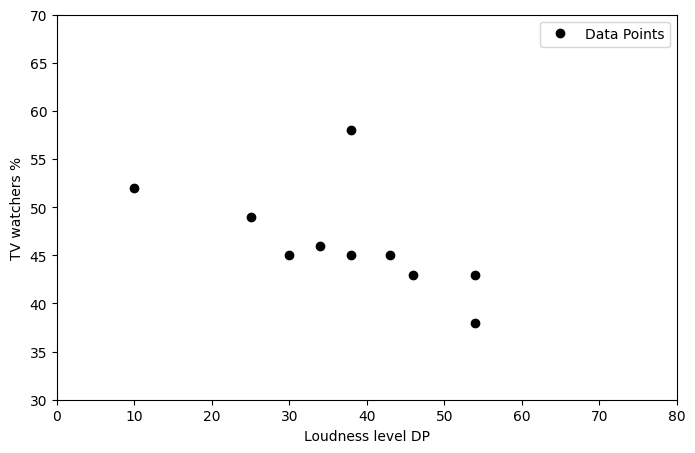

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 25, 30, 34, 38, 38, 43, 46, 54,54]  # Custom x-values
y = [52, 49, 45, 46, 45, 58, 45, 43, 43, 38]  # Custom y-values

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='', color='black', label='Data Points')

# Add labels
plt.xlabel('Loudness level DP')
plt.ylabel('TV watchers %')

# Set axis limits
plt.xlim(0, 80)
plt.ylim(30, 70)

# Show legend
plt.legend()

# Show the plot
plt.show()


In [19]:
import cvxpy as cp

e = cp.Variable(10)
a = cp.Variable()
b = cp.Variable()

obj = cp.Minimize(cp.sum(e))

cons = []
cons += [e[i] >= a*x[i] + b - y[i] for i in range(0,10)]
cons += [e[i] >= -(a*x[i] + b - y[i]) for i in range(0,10)]

problem = cp.Problem(obj, cons)
result = problem.solve()
print(result)
print(e.value)
print(a.value)
print(b.value)


21.999999154128865
[7.84250915e-08 7.49999809e-01 2.00000007e+00 9.96495451e-08
 9.97039638e-08 1.29999997e+01 1.24999961e+00 1.00522230e-07
 1.99999950e+00 3.00000013e+00]
-0.24999999248547128
54.499999926074636


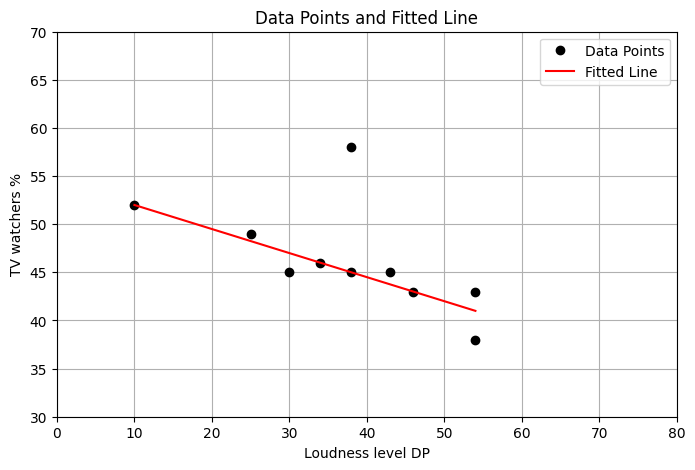

In [16]:

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='', color='black', label='Data Points')

# Generate the fitted line using optimal values of a and b
x_fit = np.linspace(min(x), max(x), 100)
y_fit = a.value * x_fit + b.value
plt.plot(x_fit, y_fit, color='red', label='Fitted Line')

# Add labels and set axis limits
plt.xlabel('Loudness level DP')
plt.ylabel('TV watchers %')
plt.xlim(0, 80)
plt.ylim(30, 70)

# Show legend and plot
plt.legend()
plt.title('Data Points and Fitted Line')
plt.grid(True)
plt.show()

### 2.5

Optimal gap: 1.5000000000039782
Optimal a: -5.1451541787250154e-11
Optimal b: 5.5000000001885


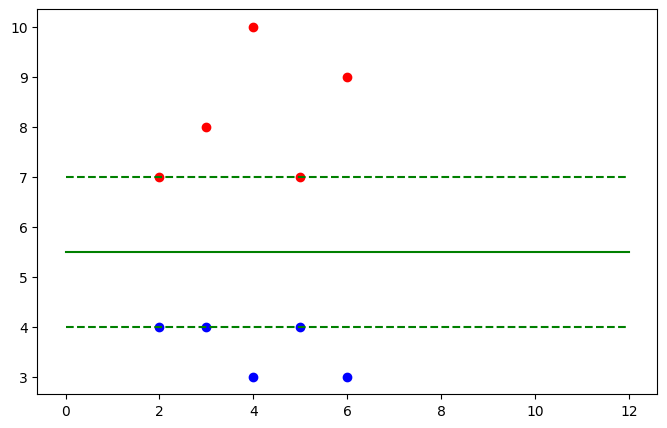

In [75]:
import cvxpy as cp

class_1_x = [2, 3, 4, 5, 6]
class_1_y = [4, 4, 3, 4, 3]

class_2_x = [2, 3, 4, 5, 6]
class_2_y = [7, 8, 10, 7, 9]


gap = cp.Variable(nonneg=True)
a = cp.Variable()
b = cp.Variable()

obj = cp.Maximize(gap)

cons1 = [class_1_y[i] <= a * class_1_x[i] + b - gap for i in range(len(class_1_x))]
cons2 = [class_2_y[i] >= a * class_2_x[i] + b + gap for i in range(len(class_2_x))]

cons = cons1 + cons2
problem = cp.Problem(obj, cons)
result = problem.solve()
print("Optimal gap:", gap.value)
print("Optimal a:", a.value)
print("Optimal b:", b.value)

#plot the line ax + b and the gap
plt.figure(figsize=(8, 5))
plt.scatter(class_1_x, class_1_y, color='blue', label='Class 1')
plt.scatter(class_2_x, class_2_y, color='red', label='Class 2')
plt.plot([0, 12], [b.value, 12*a.value + b.value], color='green', label='Decision Boundary')
plt.plot([0, 12], [b.value + gap.value, 12*a.value + b.value + gap.value], linestyle='--', color='green', label='Margin')
plt.plot([0, 12], [b.value - gap.value, 12*a.value + b.value - gap.value], linestyle='--', color='green')
plt.show()


### 2.6

Optimal centre:  (array(34.16407865), array(35.83592135))
Optimal radius: 20.03103212456623


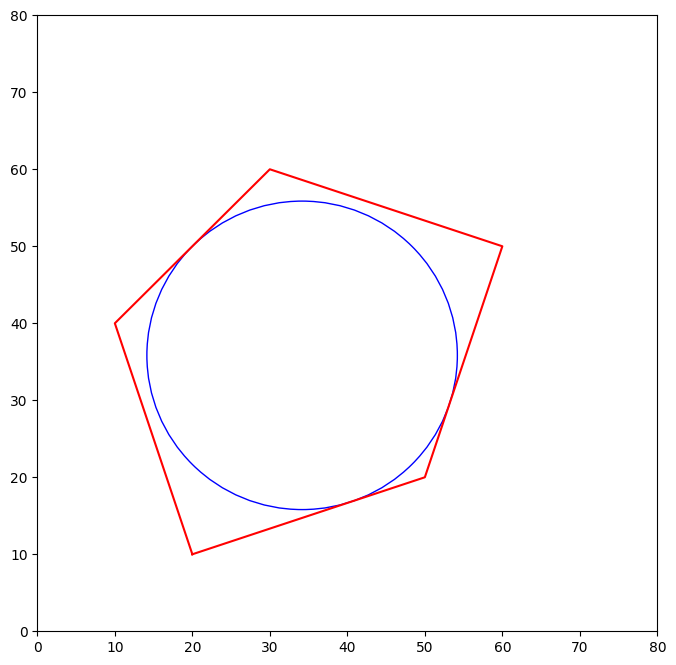

In [65]:
from math import sqrt

POLY_SIZE = 5
points = [(20, 10), (50, 20), (60, 50), (30, 60), (10, 40)]
x = [p[0] for p in points + [points[0]]]
y = [p[1] for p in points + [points[0]]]

a = [(y2 - y1) / (x2 - x1) for (x1, y1), (x2, y2) in zip(points, points[1:] + [points[0]])]
b = [y1 - a_ * x1 for a_, (x1, y1) in zip(a, points)]
r = cp.Variable(nonneg=True)

obj = cp.Maximize(r)
s1 = cp.Variable()
s2 = cp.Variable()

conspos = [(s2 - a[i] * s1 - b[i] ) / sqrt(a[i]**2 + 1) >= r for i in [-1, 0, 1]]
consneg = [(s2 - a[i] * s1 - b[i] ) / sqrt(a[i]**2 + 1) <= -r for i in [2, 3]]
problem = cp.Problem(obj, conspos + consneg)
result = problem.solve()
print("Optimal centre: ", (s1.value, s2.value))
print("Optimal radius:", r.value)

plt.figure(figsize=(8, 8))
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.plot(x, y, 'r-', label='Polygon')
circle = plt.Circle((s1.value, s2.value), r.value, color='blue', fill=False)
plt.gca().add_artist(circle)
plt.show()
